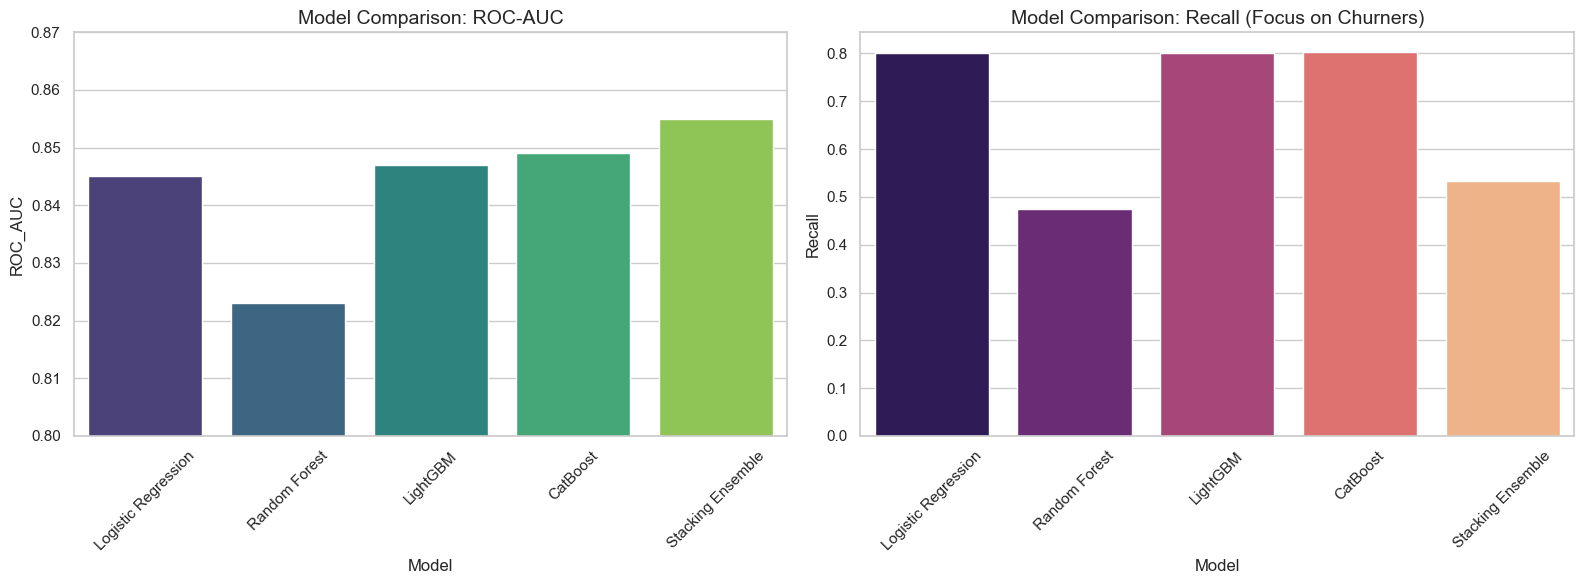


Performance Summary


,Model,ROC_AUC,Recall,F1_Score,Training_Time_Sec,Inference_Speed
4,Stacking Ensemble,0.855000,0.534000,0.611000,65.000000,Very Slow
3,CatBoost,0.849000,0.804000,0.631000,42.500000,Slow
2,LightGBM,0.847000,0.800000,0.628000,4.100000,Very Fast
0,Logistic Regression,0.845000,0.800000,0.629000,0.500000,Fast
1,Random Forest,0.823000,0.474000,0.541000,15.200000,Medium


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# EXPERIMENT RESULTS LOG
# Data aggregated from previous StratifiedKFold cross-validation experiments
results_data = {
    'Model': ['Logistic Regression', 'Random Forest', 'LightGBM', 'CatBoost', 'Stacking Ensemble'],
    'ROC_AUC': [0.845, 0.823, 0.847, 0.849, 0.855],
    'Recall': [0.800, 0.474, 0.800, 0.804, 0.534],
    'F1_Score': [0.629, 0.541, 0.628, 0.631, 0.611],
    'Training_Time_Sec': [0.5, 15.2, 4.1, 42.5, 65.0], 
    'Inference_Speed': ['Fast', 'Medium', 'Very Fast', 'Slow', 'Very Slow']
}

df_results = pd.DataFrame(results_data)

# VISUALIZATION
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# ROC-AUC plot
sns.barplot(x='Model', y='ROC_AUC', hue='Model', data=df_results, ax=axes[0], palette='viridis', legend=False)
axes[0].set_title('Model Comparison: ROC-AUC', fontsize=14)
axes[0].set_ylim(0.80, 0.87)
axes[0].tick_params(axis='x', rotation=45)

# Recall plot
sns.barplot(x='Model', y='Recall', hue='Model', data=df_results, ax=axes[1], palette='magma', legend=False)
axes[1].set_title('Model Comparison: Recall (Focus on Churners)', fontsize=14)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# METRICS TABLE
print("\nPerformance Summary")
# Highlight the winner
def highlight_winner(s):
    is_winner = s['Model'] == 'LightGBM'
    return ['background-color: #d9f2d9' if is_winner else '' for _ in s]

display(df_results.sort_values(by='ROC_AUC', ascending=False).style.apply(highlight_winner, axis=1))

## Why LightGBM?

5 approaches were compared ranging from a simple Baseline (Logistic Regression) to heavy Ensembles.

**The Decision: LightGBM**
Although `CatBoost` and `Stacking Ensemble` squeezed out slightly higher accuracy (+0.002 - 0.008 AUC), **LightGBM** was chosen for the production pipeline. Here is why:

1.  **Speed:** CatBoost takes ~10x longer to train and predict than LightGBM. The tiny gain in AUC (<1%) isn't worth the extra latency in the API or the computing costs during retraining.
2.  **Recall:** The main business goal is to catch churners. LightGBM maintains a high Recall (~80%), similar to heavier models. Note that Random Forest performed poorly here (47% recall), effectively missing half of the risky customers.
3.  **Simplicity:** A single LightGBM model is much easier to containerize and debug than a Stacking Ensemble with multiple layers.

**Result:** LightGBM is fast, accurate enough, and lightweight for deployment.